<a href="https://colab.research.google.com/github/marciagava/Especies/blob/main/EspeciesNoTempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
nome_arquivo = 'sample-formatted.json'
data= {}
i = 0
with open(nome_arquivo, 'r') as f:
    for line in f:
        new_data = json.loads(line)
        data.update({i: new_data})
        i += 1

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient='index')

df_taxon = pd.json_normalize(df['taxon'])
df = pd.concat([df, df_taxon], axis=1)
df = df.drop('taxon', axis=1)

df_locations = pd.json_normalize(df['locations'])
df = pd.concat([df, df_locations], axis=1)
df = df.drop('locations', axis=1)

df = df[['year_published','red_list_category','scientific_name','sis_id',
         'kingdom_name','phylum_name','class_name','order_name',
         'family_name']]

#Escolher uma classe: opcional
classe = 'ACTINOPTERYGII'
df = df[df['class_name'] == classe]
df = df.reset_index(drop=True)

df['year_published'] = pd.to_numeric(df['year_published'], errors='coerce')

In [ ]:
mapeamentoCategorias = {'LC': 'Menor Preocupação',
                        'LR/lc': 'Menor Preocupação',
                        'EN': 'Ameaçado',
                        'E': 'Ameaçado',
                        'NT': 'Pouco Ameaçado',
                        'LR/nt': 'Pouco Ameaçado',
                        'LR/cd': 'Pouco Ameaçado',
                        'VU': 'Vulnerável',
                        'V': 'Vulnerável',
                        'RE': 'Extinto Regionalmente',
                        'DD': 'Sem Dados de Risco',
                        'I': 'Sem Dados de Risco',
                        'K': 'Sem Dados de Risco',
                        'R': 'Sem Dados de Risco',
                        'CR': 'Criticamente Ameaçado',
                        'NA': 'Sem Dados de Risco',
                        'NE': 'Sem Dados de Risco',
                        'EX': 'Extinto',
                        'Ex': 'Extinto',
                        'Ex?': 'Extinto',
                        'EW': 'Extinto na Natureza'}

mapeamentoCategoriasOrdem = {'Sem Dados de Risco': 0,
                             'Menor Preocupação': 1,
                             'Pouco Ameaçado': 2,
                             'Vulnerável': 3,
                             'Ameaçado': 4,
                             'Criticamente Ameaçado': 5,
                             'Extinto Regionalmente':6,
                             'Extinto na Natureza': 7,
                             'Extinto': 8}

In [ ]:
df['categoria'] = df['red_list_category'].map(mapeamentoCategorias)
df['categoriaOrdem'] = df['categoria'].map(mapeamentoCategoriasOrdem)

Espécies sugeridas: Acipenser fulvescens, Barbodes binotatus, Pseudobarbus erubescens, Pungu maclareni, Melanocharacidium blennioides, Barbodes palata, Characodon garmani

In [ ]:
#especie = input("Escolha a espécie: ")

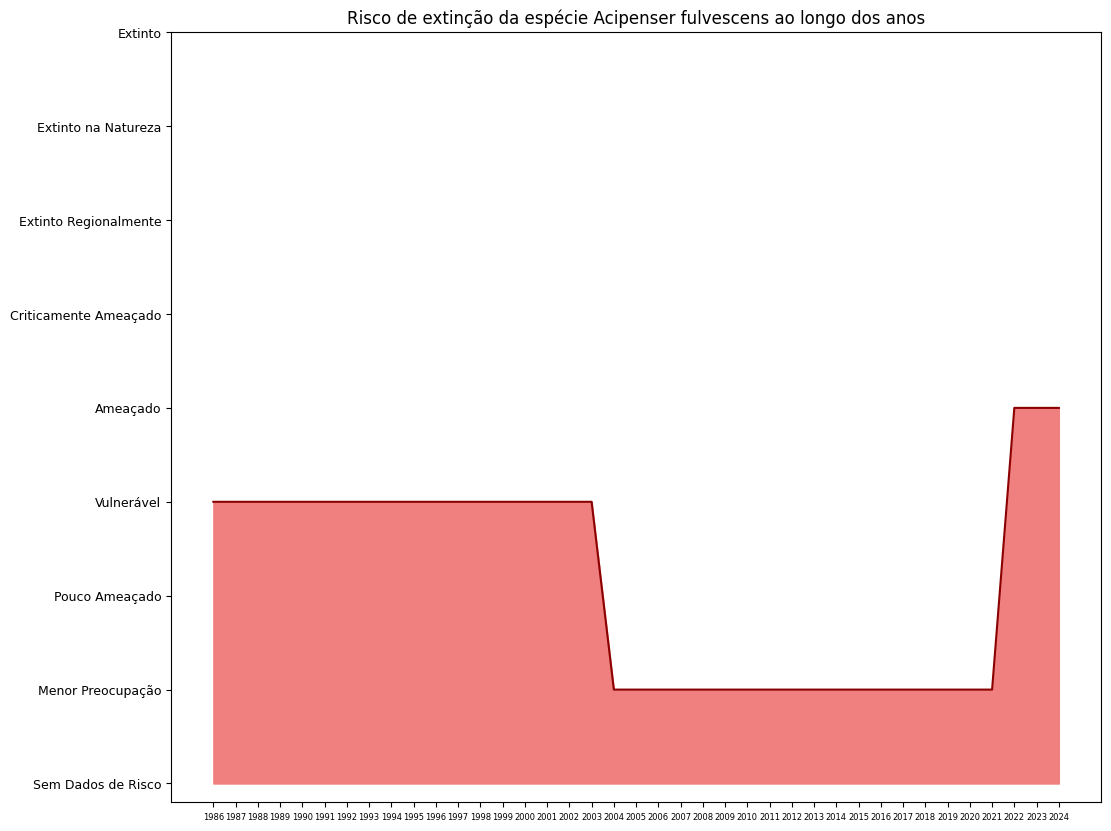

In [ ]:
especie = 'Acipenser fulvescens'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()


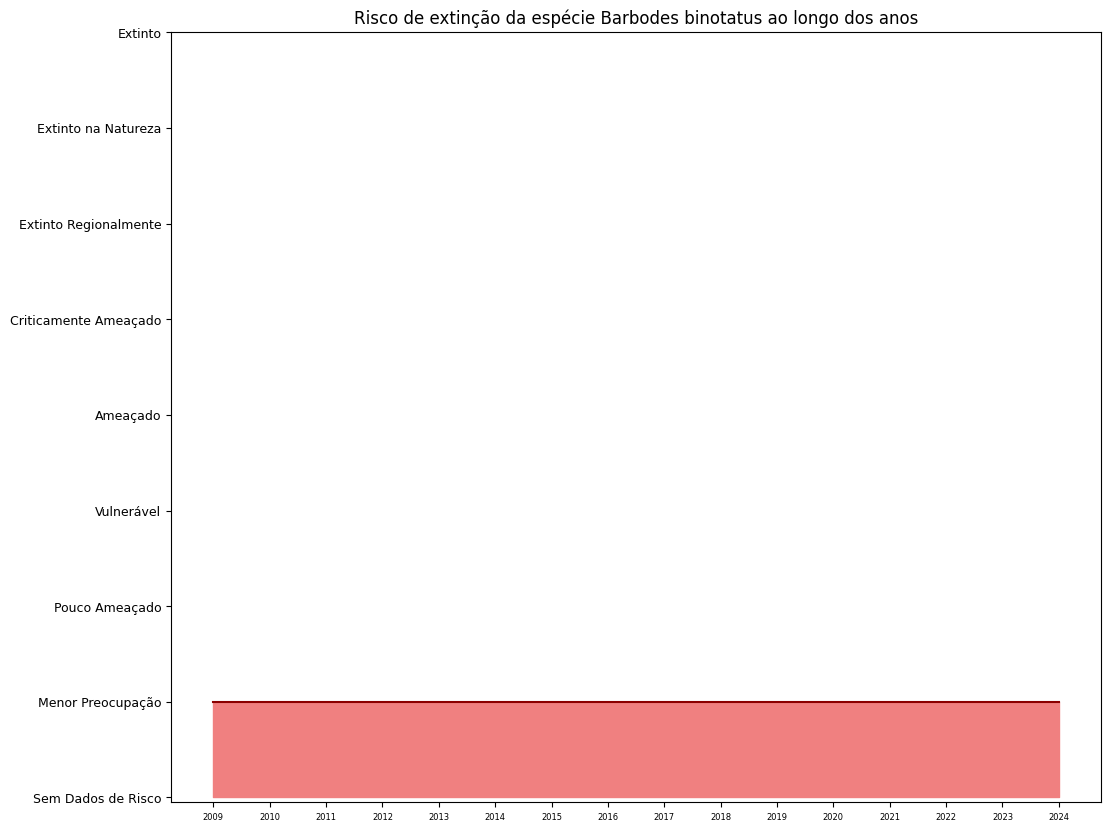

In [ ]:
especie = 'Barbodes binotatus'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()

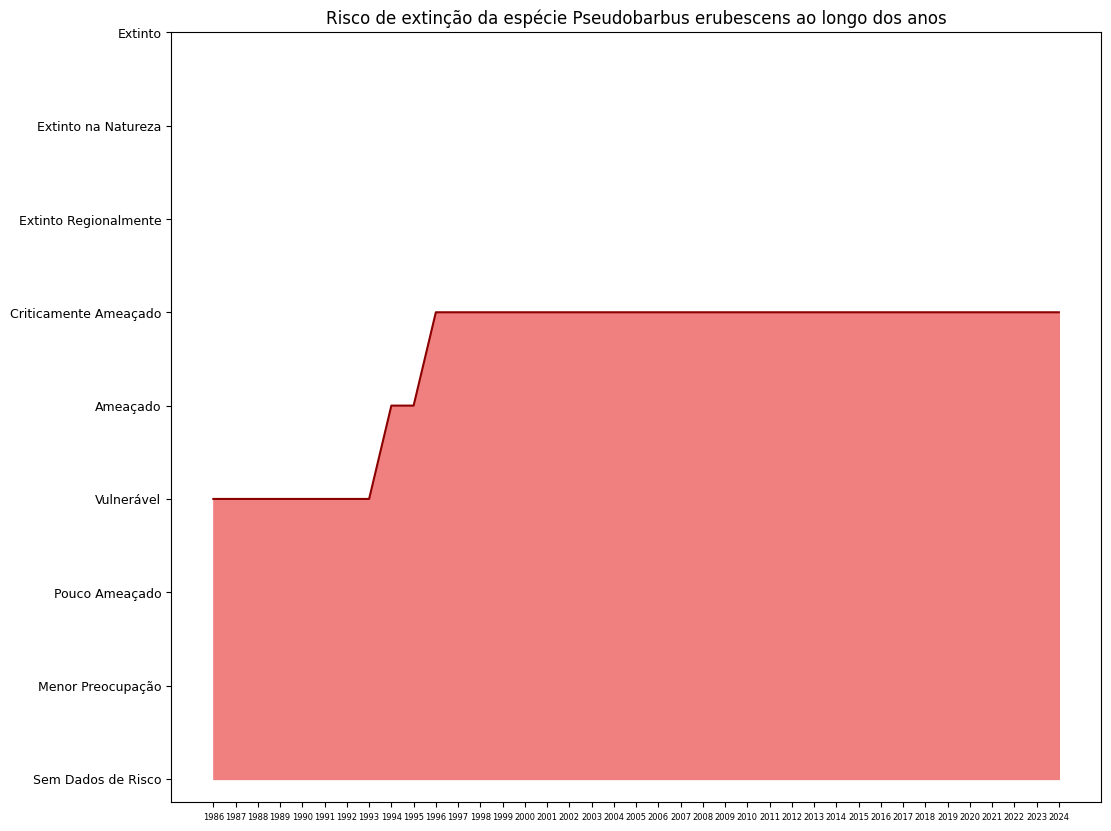

In [ ]:
especie = 'Pseudobarbus erubescens'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()

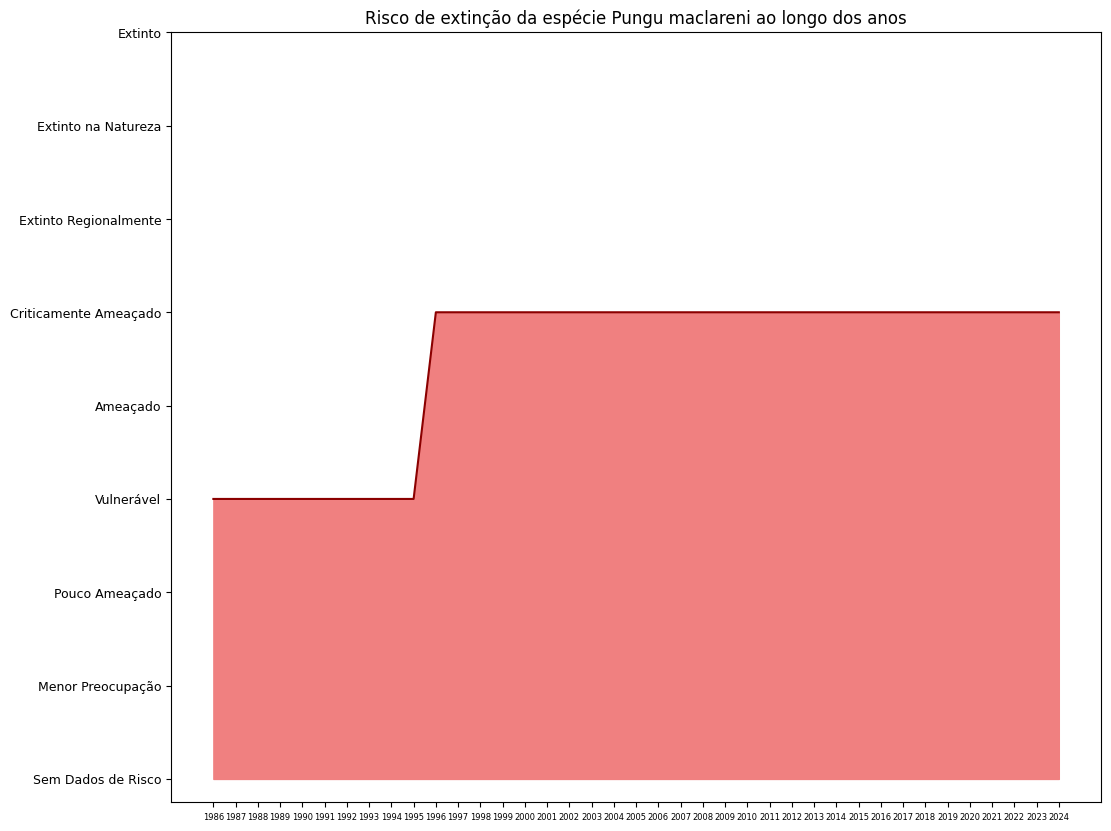

In [ ]:
especie = 'Pungu maclareni'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()

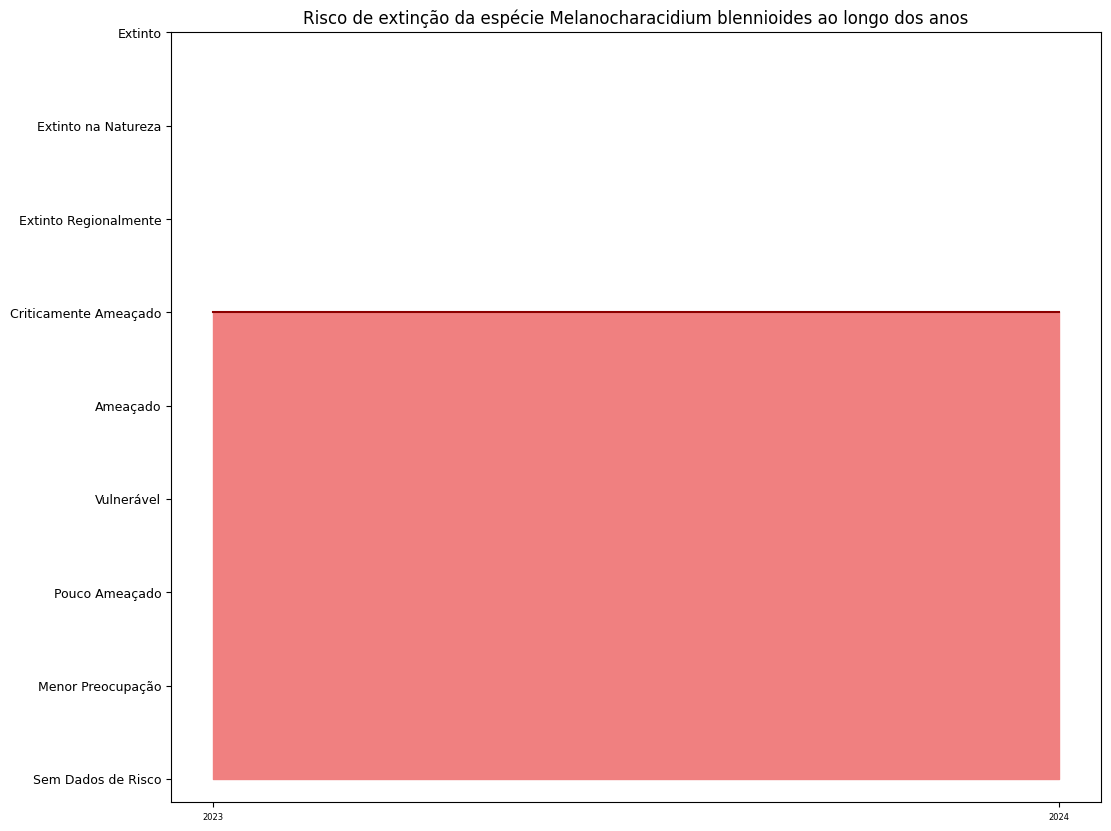

In [ ]:
especie = 'Melanocharacidium blennioides'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()

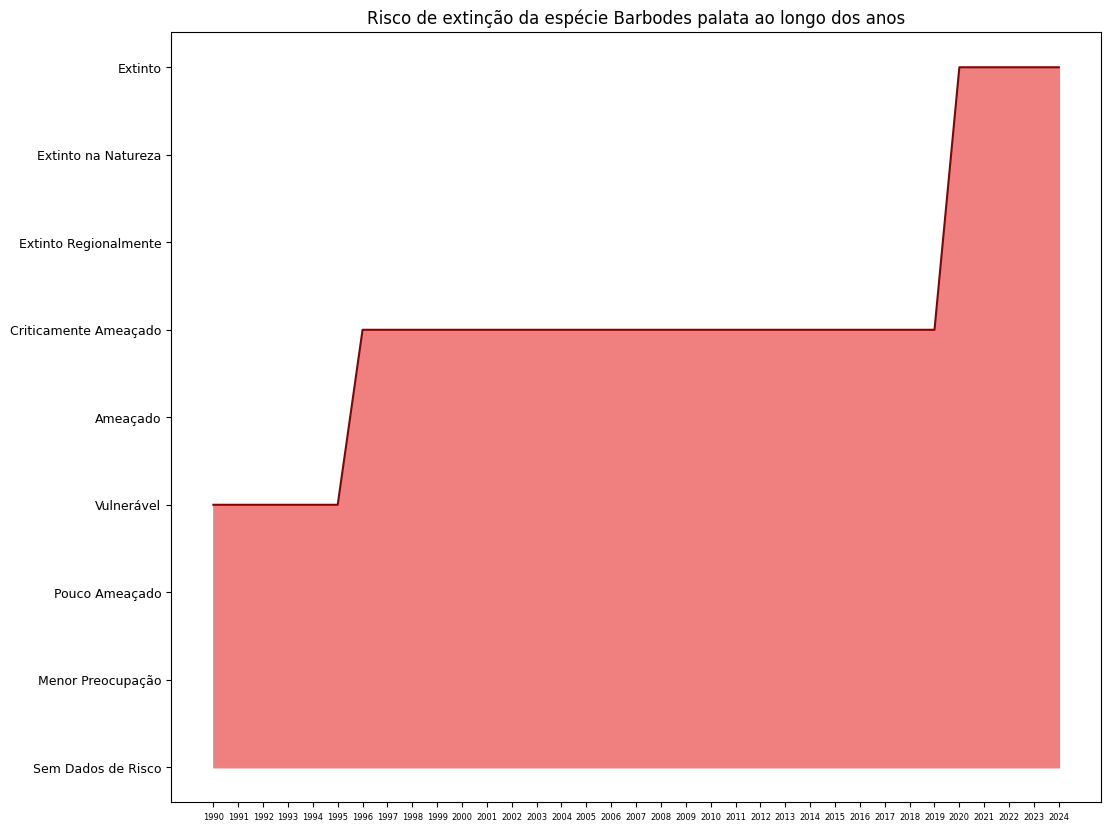

In [ ]:
especie = 'Barbodes palata'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()

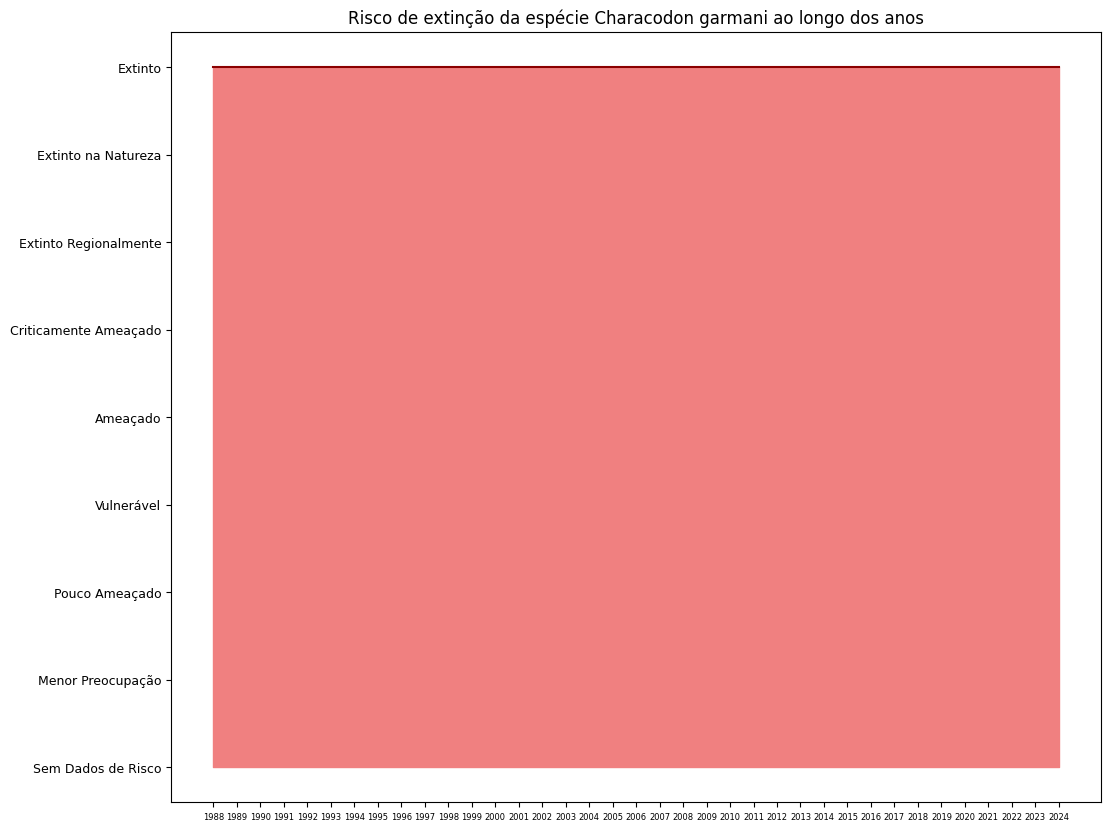

In [ ]:
especie = 'Characodon garmani'
import matplotlib.pyplot as plt
import datetime
year = datetime.date.today().year

df_especie = df[df['scientific_name'] == especie]

if len(df_especie) == 0:
    print(f"Não foram encontradas espécies com o nome {especie}")
else:

  ano = pd.Series(list(range(min(df_especie['year_published']), year+1)),
                name="Anos")
  df_plot = ano.to_frame()
  df_plot = df_plot.merge(df_especie[['year_published', 'categoria', 'categoriaOrdem']], how='left', left_on='Anos', right_on='year_published')
  df_plot.drop('year_published', axis=1, inplace=True)
  df_plot = df_plot.ffill()

  plt.figure(figsize=(12, 10))
  plt.plot(df_plot['Anos'], df_plot['categoriaOrdem'], color='darkred')
  plt.fill_between(df_plot['Anos'], df_plot['categoriaOrdem'], color='lightcoral')
  y_ticks = list(mapeamentoCategoriasOrdem.keys())
  y_tick_positions = list(mapeamentoCategoriasOrdem.values())
  plt.yticks(y_tick_positions, y_ticks, size = 9)
  plt.xticks(df_plot['Anos'].unique(), size = 6)
  plt.title(f'Risco de extinção da espécie {especie} ao longo dos anos')
  plt.grid(False)
  plt.show()